In [7]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [62]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [63]:
def tester(a):
    if (a%2) == 0:
        return 1
    else:
        return 0

In [64]:
def Cgeom(mx):
    cspeed = 299792458
    R      = 11.6
    B      = 0.62
    vd     = 200/cspeed
    vn     =230 /cspeed
    hbarc  = (0.1973269788e-15)
    rho    = 0.4*(hbarc**3)*1e6
    km = 1000
    
    return np.pi*(R*km/hbarc)**2 *( (1 - B)/B ) * ( rho/mx ) * (np.erf(np.sqrt(3/2) * ( vn/vd ) )/(vn*km) )

In [65]:
Cgeom(1)

25.419642082687975

In [66]:
# colours = ['#ebe831', '#ffac32', '#ff7259', '#e14a7c', '#9e4091', '#433f8c']
colours = ['#ebe831', '#ffae2f', '#ff725c', '#fd468b', '#b944b1', '#4250bd']
leg_labels = ['10$^1$K', '10$^2$K', '10$^3$K', '10$^4$K', '10$^5$K', '10$^6$K']


    


In [95]:

files = glob.glob('*_cap.dat')
cap_rates = {}
    
for file in files:
    cap_rates[file.replace('_cap.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    

def cap_plots():



    fig, ax = plt.subplots(figsize = (10,6), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 200)
    fig.subplots_adjust(hspace=0, wspace=0)
    i = 1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            col.loglog(10**cap_rates['d'+str(i)][0], cap_rates['d'+str(i)][1])
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            col.set_xlim(10**-4.8, 10**5)
            i += 1

In [117]:

def geom_lim_plots():
    fig, ax = plt.subplots(figsize = (5, 3), dpi = 300)
    ax.loglog(10**cap_rates['d0'][0],cap_rates['d0'][1]/6.58e-25, color = '#006a9c')
    ax.loglog(10**cap_rates['d0'][0],Cgeom(10**cap_rates['d0'][0])/6.58e-25, color = '#f0bc02')
    ax.set_title('Capture rate')
    ax.grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax.set_xlim(10**-4.8, 10**5)
    ax.set_xlabel('$m_\chi$ [GeV]')
    ax.set_ylabel('$C$ [s$^{-1}$]')
    plt.show()

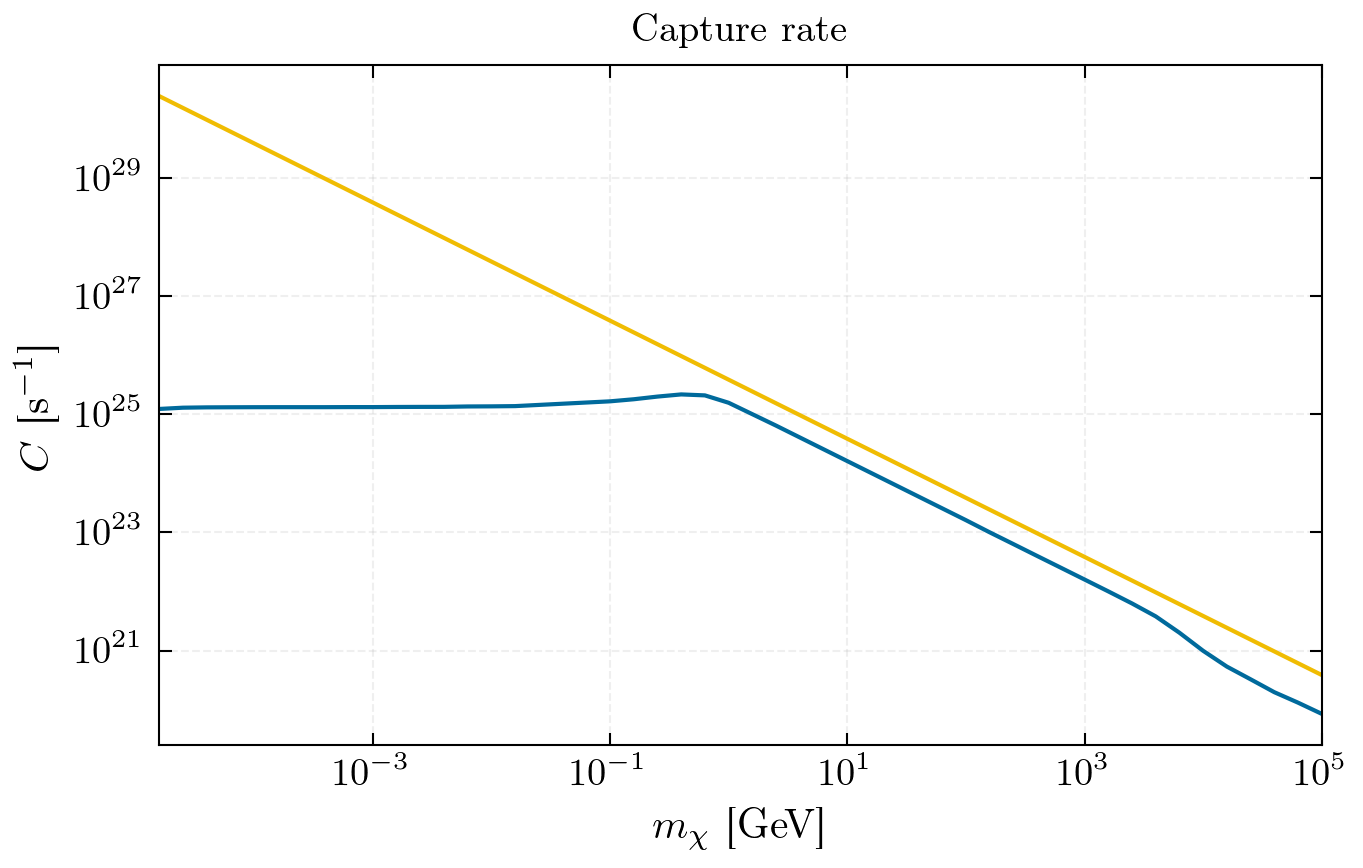

In [118]:
geom_lim_plots()